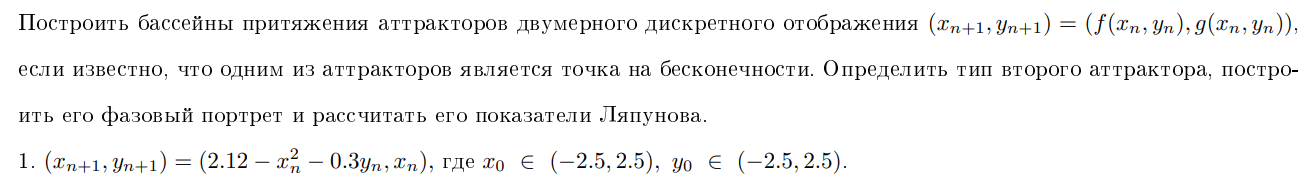

<ipython-input-1-c3e8e0a47174>:7: RuntimeWarning: overflow encountered in scalar power
  return 2.12 - x_n**2 - 0.3*y_n, x_n


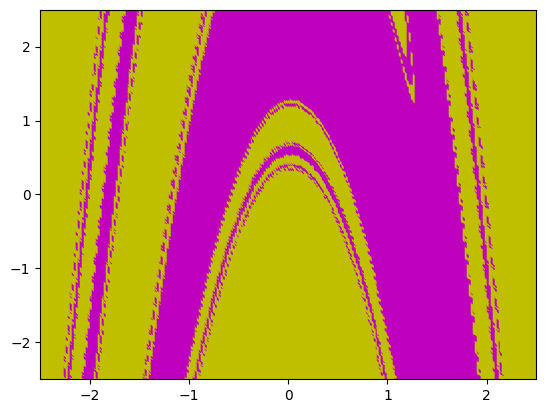

In [ ]:
#attractor pools

import numpy as np
import matplotlib.pyplot as plt

def dspl(x_n, y_n):
  return 2.12 - x_n**2 - 0.3*y_n, x_n

x0 = np.linspace(-2.5, 2.5, 251)
y0 = np.linspace(-2.5, 2.5, 251)

for x_i in x0:
  for y_i in y0:
    x, y = dspl(x_i, y_i)
    for i in range(10):
      x, y = dspl(x, y)
    if np.abs(x) > 100 or np.abs(y) > 100:
      plt.plot(x_i, y_i, marker = '.', color = 'y')
    else:
      plt.plot(x_i, y_i, marker = '.', color = 'm')

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.show()

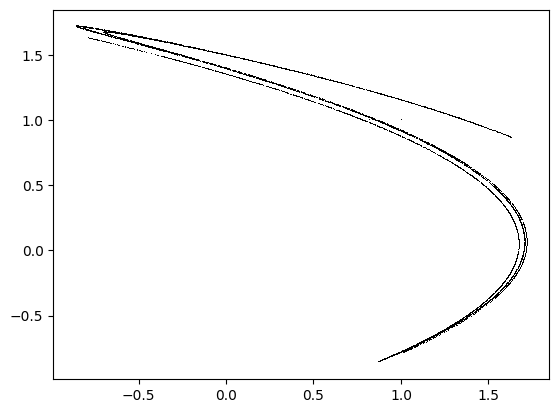

In [ ]:
#mapping attractor

x = 1
y = 1

for i in range(10000):
  plt.plot(x, y, marker = ',', color = 'k')
  x, y = dspl(x, y)

plt.show()

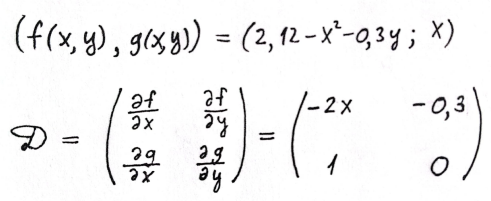

In [ ]:
#Lyapunov exponents

x = 1
y = 1

def Dj(w, x):
  w1 = [0, 0]
  w1[0] = -2*x*w[0] - 0.3 * w[1]
  w1[1] = w[0]
  return w1

r_1 = []
r_2 = []

w1 = np.array([1, 0])
w2 = np.array([0, 1])
y1 = np.zeros(2)
y2 = np.zeros(2)

for i in range(200):
  x, y = dspl(x, y)

for i in range(1000):
  x, y = dspl(x, y)
  w1 = Dj(w1, x)
  w2 = Dj(w2, x)
  y1 = w1
  y2[0] = w2[0] - (y1[0]*w2[0] + y1[1]*w2[1])*y1[0] / (y1[0]**2 + y1[1]**2)
  y2[1] = w2[1] - (y1[0]*w2[0] + y1[1]*w2[1])*y1[1] / (y1[0]**2 + y1[1]**2)
  r_1 += [np.sqrt(y1[0]**2 + y1[1]**2)]
  r_2 += [np.sqrt(y2[0]**2 + y2[1]**2)]
  w1 = y1 / np.sqrt(y1[0]**2 + y1[1]**2)
  w2 = y2 / np.sqrt(y2[0]**2 + y2[1]**2)

L_1 = np.sum(np.log(r_1))/1000
L_2 = np.sum(np.log(r_2))/1000
print("1: ", L_1)
print("2: ", L_2)

#L_1 > 0  =>  chaotic attractor

1:  0.3871068986459686
2:  -1.5910797029719046
